In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division

def rk4(f, x, h, *args):
   
    k_1 = f(x, *args)*h
    k_2 = f(x + 0.5*k_1, *args)*h
    k_3 = f(x + 0.5*k_2, *args)*h
    k_4 = f(x + k_3, *args)*h
    
    return x + 1/6. * (k_1 + 2.*(k_2 + k_3) + k_4 )

def harmonic(x, w, w_0):
    return np.array([x[1], - w*w*x[0]/(w_0*w_0)])

def takens(x, a, b, g):
    gg = g*g
    return np.array([
            x[1],
            gg*(a - x[0]*(b + x[0]*(1. - x[0]))) - g*x[0]*x[1]*(x[0]-1.) 
        ])

In [ ]:
x = np.array([0.1, -0.1])
w = 1.
w_0 = 0.5

dt = 1/10000.

y = np.zeros(20*1000)

for i in range(20*np.int(1/dt)):
    x = rk4(harmonic, x, dt, w, w_0)
    if not i%10:
        y[i / 10] = x[0]
        
    
plt.plot(y)

In [7]:
import numpy as np

class System(object):

    def __init__(self, vector_field, initial_cond,
                 t_0=0, field_pars=None, dt=1e-4, ode_func=rk4, sampling_rate=None):
        
        self.vector_field = vector_field
        self.field_pars = field_pars
        self.x = initial_cond
        self.t = t_0
        
        self.ode_func = rk4
        self.dt = dt
        self.sampling_rate = np.int(0.1/dt) if sampling_rate is None else sampling_rate
        self.steps_per_sample = np.int(1/(self.sampling_rate*self.dt))
        
    def __iter__(self):
        return(self)
    
    def next(self):
        self.x = self.ode_func(self.vector_field, self.x, self.dt, *self.field_pars)
        self.t = self.t + self.dt
        return self.x
    
    def integrate(self, t_f, t_0=None, x_0=None):
        # integrate over a period of time
        self.t = self.t if t_0 is None else t_0
        self.x = self.x if x_0 is None else x_0
        
        n_steps = np.int((t_f - self.t)/self.dt)
        n_samples = np.int(np.floor(n_steps/self.steps_per_sample))
        

        x = np.zeros([n_samples, self.x.shape[0]])
        x[:] = np.nan
        print x.shape
        for i in range(n_steps):
            self.next()
            if not i%self.steps_per_sample:
                x[i / self.steps_per_sample, :] = self.x
        return x
    

In [8]:
# very basic example: harmonic oscillator
x = np.array([0.1, -0.1])
w = 1.
w_0 = 0.5

s = System(harmonic, np.array([0, -0.1]), field_pars = [w, w_0], sampling_rate=10000)
z = s.integrate(20)
#plt.plot(z[0,:]);

(200000, 2)


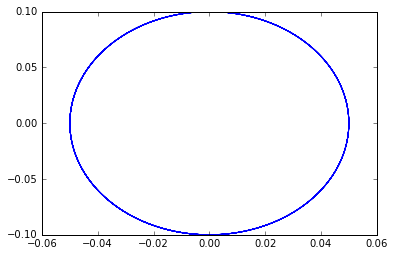

In [13]:
plt.plot(z[:,0], z[:,1]);

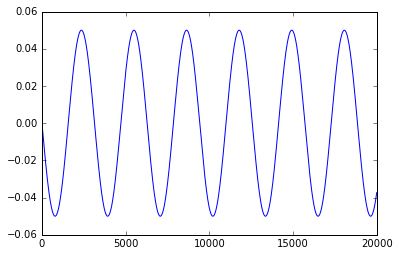

In [32]:
y = np.zeros(20*1000)
for i in range(20*np.int(1/dt)):
    s.next()
    if not i%10:
        y[i / 10] = s.x[0]
plt.plot(y)

In [7]:
def tst(vector_field, dt=0.001,  *field_pars):
    print vector_field
    print field_pars

tst(harmonic, 1., 5., 6)

<function harmonic at 0x7f857a6556e0>
(6,)


In [ ]:
x = np.array([0.1, -0.1])
w = 1.

dt = 1/10000.

y = np.zeros(20*1000)

for i in range(20*np.int(1/dt)):
    x = rk4(harmonic, x, dt, w)
    if not i%10:
        y[i / 10] = x[0]
        
    
plt.plot(y)

In [5]:
y.shape

(20000,)

In [8]:
a is None

True